# Week 1: Exploratory data anaylsis

In [25]:
#import packages
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os
import warnings
warnings.filterwarnings("ignore")

In [26]:
# import and read the dataset
path = kagglehub.dataset_download("adilshamim8/cost-of-international-education")
print(os.listdir(path))
data = pd.read_csv(os.path.join(path, "International_Education_Costs.csv"))
pd.set_option("max_info_columns", 100)

['International_Education_Costs.csv']


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [28]:
data.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


In [29]:
data.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


#### Handling missing values and duplicates

In [30]:
#handling missing values
print("\nHandling missing values\n{}".format("-" * 35))
for i in data.columns: 
    if data[i].isna().sum() !=0:
        print("null values in ", i, "column:", data[i].isna().sum())
    else: 
        print(f"There is no missing values in the column {i}")

# handle duplicates 
print("\nHandling duplicate values\n{}".format("-" * 35))

if data.duplicated().sum():
    print(f"Number of duplicated rows: {data.duplicated().sum()}")
    data.drop_duplicates(inplace=True)
else: 
    print("No duplicates")


Handling missing values
-----------------------------------
There is no missing values in the column Country
There is no missing values in the column City
There is no missing values in the column University
There is no missing values in the column Program
There is no missing values in the column Level
There is no missing values in the column Duration_Years
There is no missing values in the column Tuition_USD
There is no missing values in the column Living_Cost_Index
There is no missing values in the column Rent_USD
There is no missing values in the column Visa_Fee_USD
There is no missing values in the column Insurance_USD
There is no missing values in the column Exchange_Rate

Handling duplicate values
-----------------------------------
No duplicates


# EDA

- Profile cost distributions by Country, City, Level, and Program.
- Visualize correlations among Tuition_USD, Living_Cost_Index, Rent_USD, and Exchange_Rate.
- Compute baseline Total Cost of Attendance (tuition + rent × months + visa + insurance × years).
- Detect outliers and assess currency-conversion stability.



Profile cost distributions by Country, City, Level, and Program.

In [31]:
data.columns

Index(['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years',
       'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD',
       'Insurance_USD', 'Exchange_Rate'],
      dtype='object')

### Fixing swapped values for the Univercity and City columns

In [32]:
# Check for swapped values between "University" and "City" for specific cases
swapped_rows = data[(data["City"] == "MIT") & (data["University"] == "Massachusetts")]

if not swapped_rows.empty:
    # Display rows with swapped values
    print("Rows with swapped values:")
    print(swapped_rows)

    # Fix the swapped values
    data.loc[swapped_rows.index, ["University", "City"]] = data.loc[swapped_rows.index, ["City", "University"]].values

    # Verify the fix
    print("\nAfter fixing swapped values:")
    print(data.loc[swapped_rows.index])
else:
    print("No swapped values found for 'Massachusetts' and 'MIT'.")


# Identify potential swaps where "City" contains "University" but "University" does not
potential_swaps = data[(data["City"].str.contains("University", na=False, case=False)) & 
                       (~data["University"].str.contains("University", na=False, case=False))]

if not potential_swaps.empty:
    print("Potential swaps found:")
    print(potential_swaps)
else:
    print("No potential swaps found.")

Rows with swapped values:
    Country City     University   Program Level  Duration_Years  Tuition_USD  \
870     USA  MIT  Massachusetts  Robotics   PhD             5.0        56000   

     Living_Cost_Index  Rent_USD  Visa_Fee_USD  Insurance_USD  Exchange_Rate  
870               82.1      2100           160           1500            1.0  

After fixing swapped values:
    Country           City University   Program Level  Duration_Years  \
870     USA  Massachusetts        MIT  Robotics   PhD             5.0   

     Tuition_USD  Living_Cost_Index  Rent_USD  Visa_Fee_USD  Insurance_USD  \
870        56000               82.1      2100           160           1500   

     Exchange_Rate  
870            1.0  
No potential swaps found.


### Correlation of variables

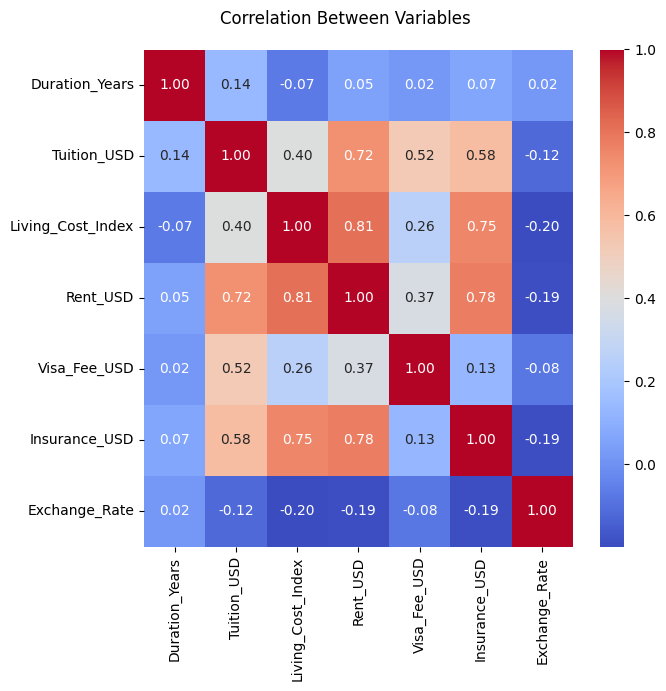

In [33]:
# Plotting the correlation matrix
ouput_folder = "plots"
plt.figure(figsize=(7, 7))
numeric_data = data.select_dtypes(include=["int64", "float64"]).columns
sns.heatmap(data[numeric_data].corr(), annot=True, cmap = "coolwarm", fmt = "0.2f", cbar = True,  linewidths=0)
plt.suptitle("Correlation Between Variables")
plt.tight_layout()
filepath = os.path.join(ouput_folder, "correlation_matrix.png")
plt.savefig(filepath, dpi = 300, bbox_inches = "tight")
plt.show()


Correlation: 1-0.8 strong, 0.8-0.5 moderate, 0.5-0.3 weak, 0.3-0 no correlation
- strongly correlated values: Living_cost_index x rent (Probably living cost index is calculated upon factors including rent)


In [34]:
# Categorize correlation values
correlation_matrix = data[numeric_data].corr()
correlation_table = []

for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
    
        if col != idx:  # Avoid self-correlation
            corr_value = correlation_matrix.loc[idx, col]
            if corr_value >= 0.8:
                category = "Highly Correlated"
            elif 0.5 <= corr_value < 0.8:
                category = "Moderately Correlated"
            elif 0.3 <= corr_value < 0.5:
                category = "Weakly Correlated"
            else:
                category = "No Correlation"
            correlation_table.append({"Variable 1": idx, "Variable 2": col, "Correlation": corr_value, "Category": category})

# Convert to DataFrame for better visualization
correlation_df = pd.DataFrame(correlation_table)
print(correlation_df)

           Variable 1         Variable 2  Correlation               Category
0         Tuition_USD     Duration_Years     0.140232         No Correlation
1   Living_Cost_Index     Duration_Years    -0.068300         No Correlation
2            Rent_USD     Duration_Years     0.051565         No Correlation
3        Visa_Fee_USD     Duration_Years     0.017424         No Correlation
4       Insurance_USD     Duration_Years     0.065670         No Correlation
5       Exchange_Rate     Duration_Years     0.020097         No Correlation
6      Duration_Years        Tuition_USD     0.140232         No Correlation
7   Living_Cost_Index        Tuition_USD     0.396830      Weakly Correlated
8            Rent_USD        Tuition_USD     0.724445  Moderately Correlated
9        Visa_Fee_USD        Tuition_USD     0.522490  Moderately Correlated
10      Insurance_USD        Tuition_USD     0.582407  Moderately Correlated
11      Exchange_Rate        Tuition_USD    -0.116710         No Correlation

In [35]:
print(data[numeric_data].corr())

                   Duration_Years  Tuition_USD  Living_Cost_Index  Rent_USD  \
Duration_Years           1.000000     0.140232          -0.068300  0.051565   
Tuition_USD              0.140232     1.000000           0.396830  0.724445   
Living_Cost_Index       -0.068300     0.396830           1.000000  0.811128   
Rent_USD                 0.051565     0.724445           0.811128  1.000000   
Visa_Fee_USD             0.017424     0.522490           0.256820  0.374079   
Insurance_USD            0.065670     0.582407           0.754393  0.776770   
Exchange_Rate            0.020097    -0.116710          -0.198685 -0.193944   

                   Visa_Fee_USD  Insurance_USD  Exchange_Rate  
Duration_Years         0.017424       0.065670       0.020097  
Tuition_USD            0.522490       0.582407      -0.116710  
Living_Cost_Index      0.256820       0.754393      -0.198685  
Rent_USD               0.374079       0.776770      -0.193944  
Visa_Fee_USD           1.000000       0.129655 

### Compute baseline Total Cost of Attendance (tuition + rent × months + visa + insurance × years).


In [36]:
data["Total_cost"] = data["Tuition_USD"] + data["Rent_USD"]*12*data["Duration_Years"] + data["Visa_Fee_USD"] + data["Insurance_USD"]*data["Duration_Years"]
data.tail()
data.to_csv("data_full.csv", index=False)


#### Outlier Detection

In [37]:
# IQR for outlier detection
filtered_data = data.copy()
for c in data.select_dtypes(include = "number").columns:
    
    Q1 = data[c].quantile(0.25)
    Q3 = data[c].quantile(0.75)
    IQR = Q3 -Q1
    
    # Calculate the upper bound for outlier
    upper = Q3 + 1.5 * IQR

    # Calculate the lower bound of the outlier
    lower = Q1 - 1.5 *IQR
    print(f"Outlier bounds for {c}: lower bound {lower}, upper_bound {upper}, IQR:{IQR}")
    # Filter the data
    filtered_data = filtered_data[(filtered_data[c] >= lower) & (filtered_data[c] <= upper)]
    
# data shape before outlier removal
print(f"Shape of data before outlier removal: {data.shape}")
# data shape after outlier removal
print(f"Shape of data after outlier removal: {filtered_data.shape}")

# head the filtered data
print(filtered_data.head())



Outlier bounds for Duration_Years: lower bound -1.0, upper_bound 7.0, IQR:2.0
Outlier bounds for Tuition_USD: lower bound -39525.0, upper_bound 73475.0, IQR:28250.0
Outlier bounds for Living_Cost_Index: lower bound 32.45000000000001, upper_bound 96.04999999999998, IQR:15.899999999999991
Outlier bounds for Rent_USD: lower bound -587.5, upper_bound 2432.5, IQR:755.0
Outlier bounds for Visa_Fee_USD: lower bound -110.0, upper_bound 450.0, IQR:140.0
Outlier bounds for Insurance_USD: lower bound -75.0, upper_bound 1325.0, IQR:350.0
Outlier bounds for Exchange_Rate: lower bound -8.425, upper_bound 16.495, IQR:6.23
Outlier bounds for Total_cost: lower bound -56788.75, upper_bound 155033.25, IQR:52955.5
Shape of data before outlier removal: (907, 13)
Shape of data after outlier removal: (556, 13)
       Country       City                        University  \
2       Canada    Toronto             University of Toronto   
3    Australia  Melbourne           University of Melbourne   
4      Germa

- after removing of the outliers there are almost 40% of the dataset gone. 
- the ideas ist that those outliers belong to the nature of the dataset, e.g the elite universities have higher coste anyways. 
- I will procede without removal of the outlier. Maybe later if I come up with better idea what to do with the too high or too low values in the columns....

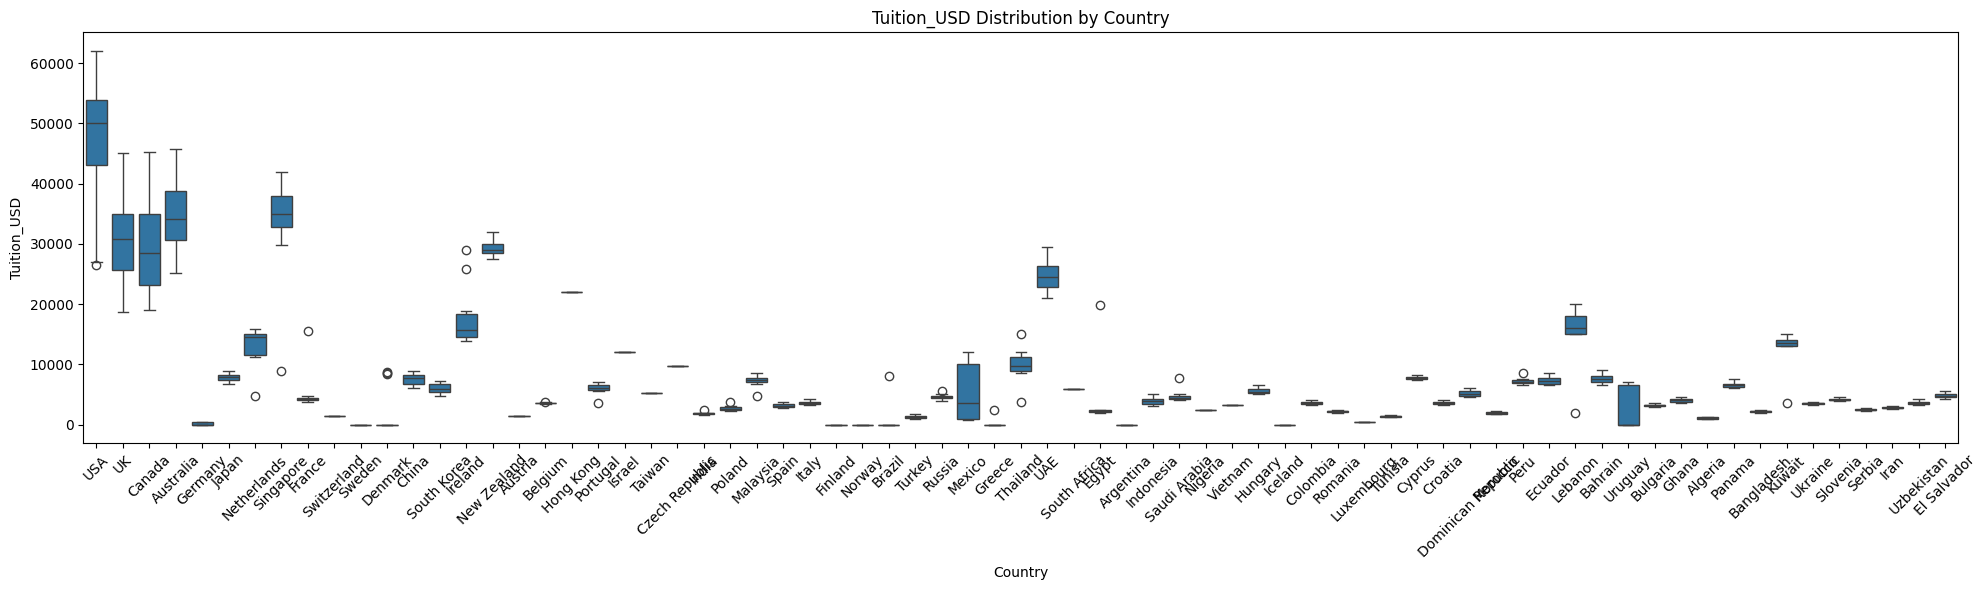

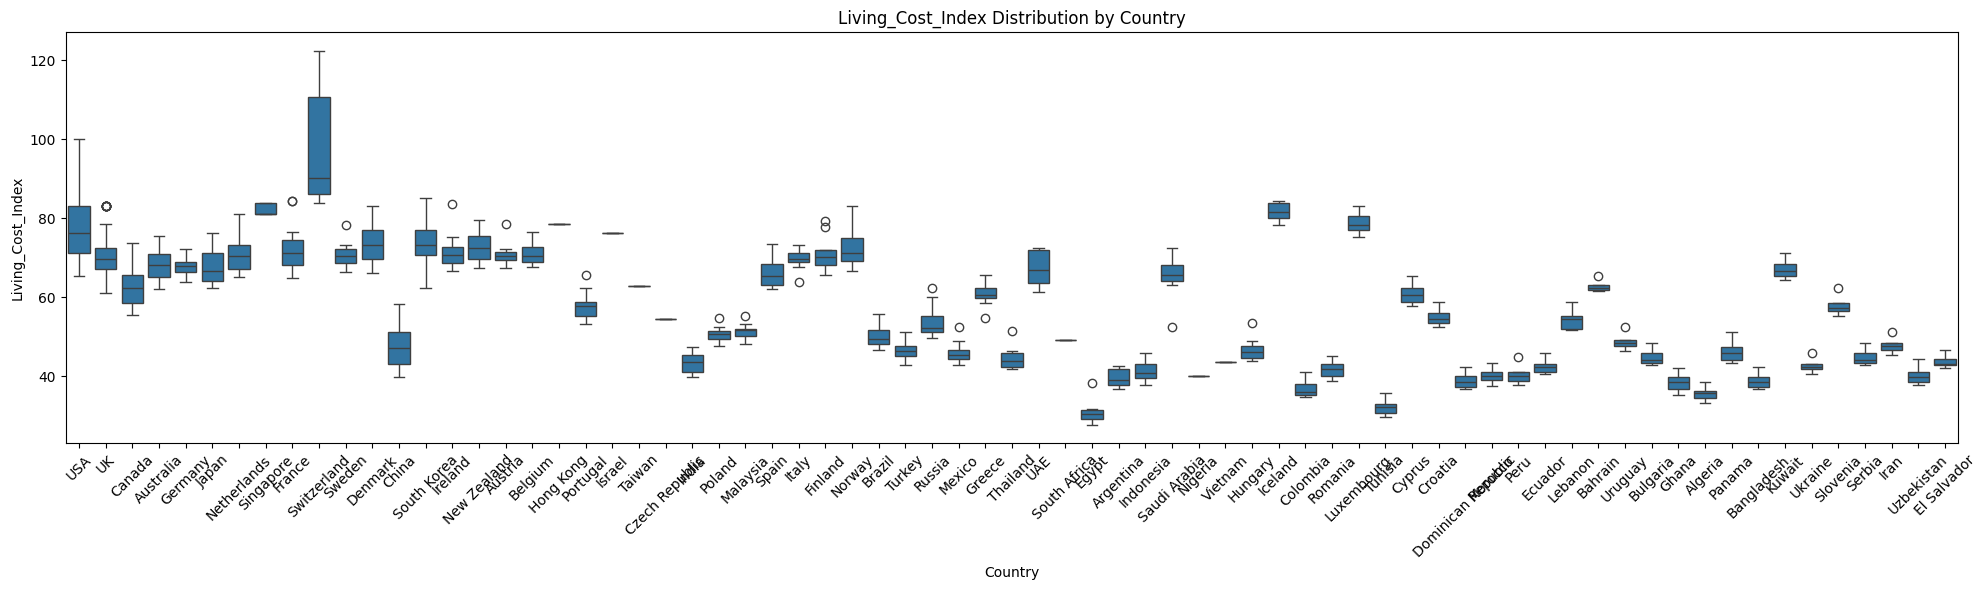

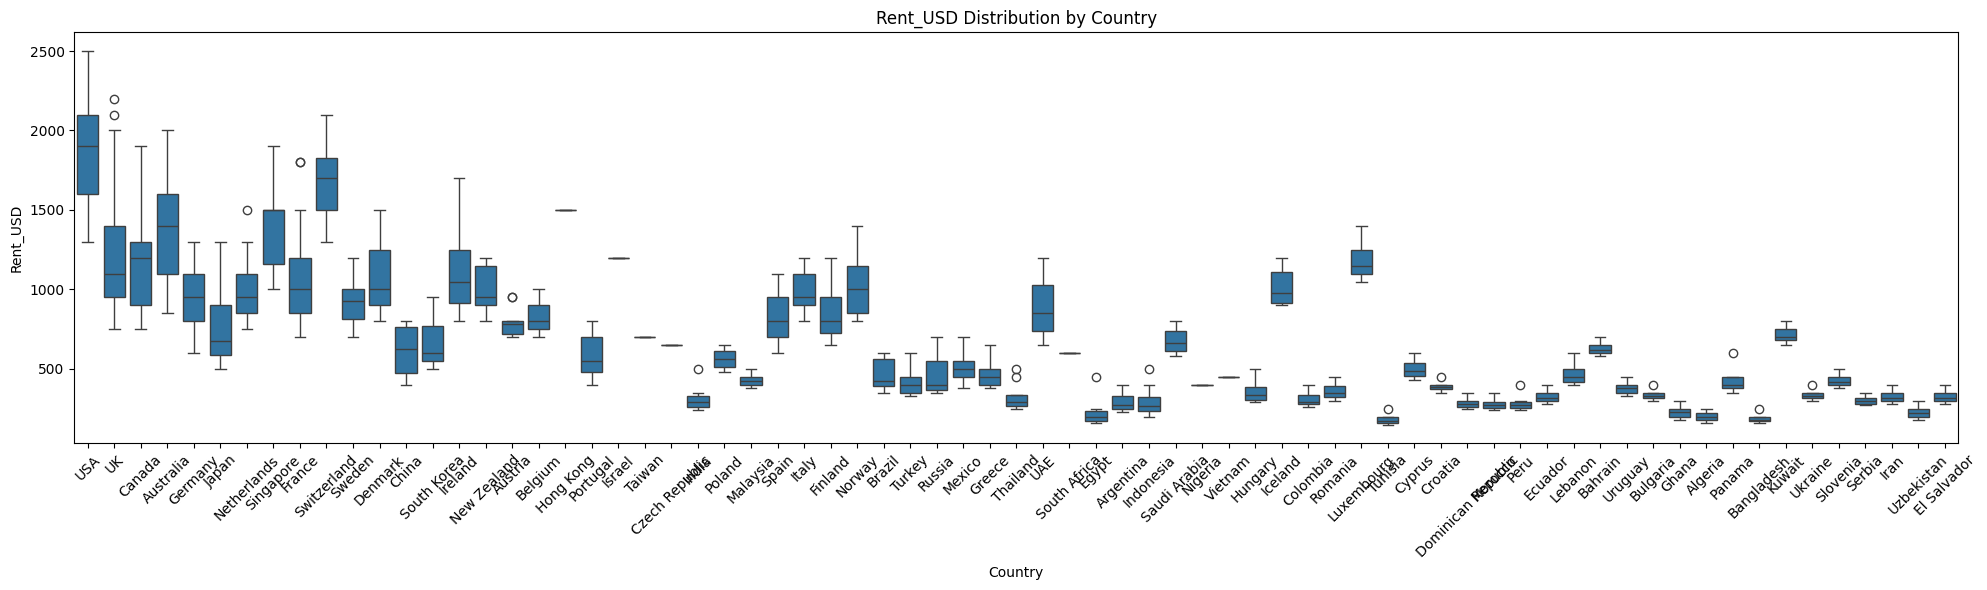

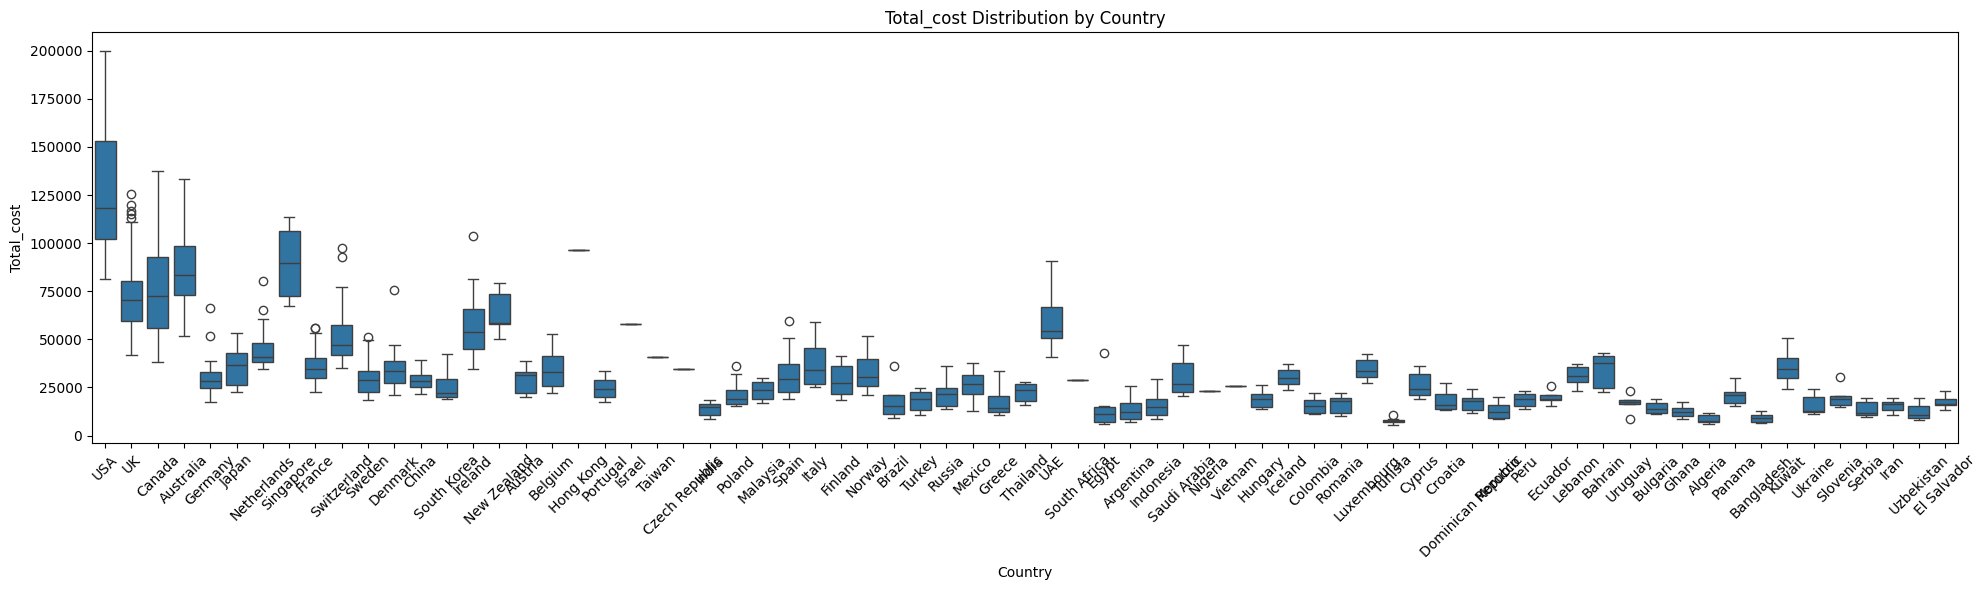

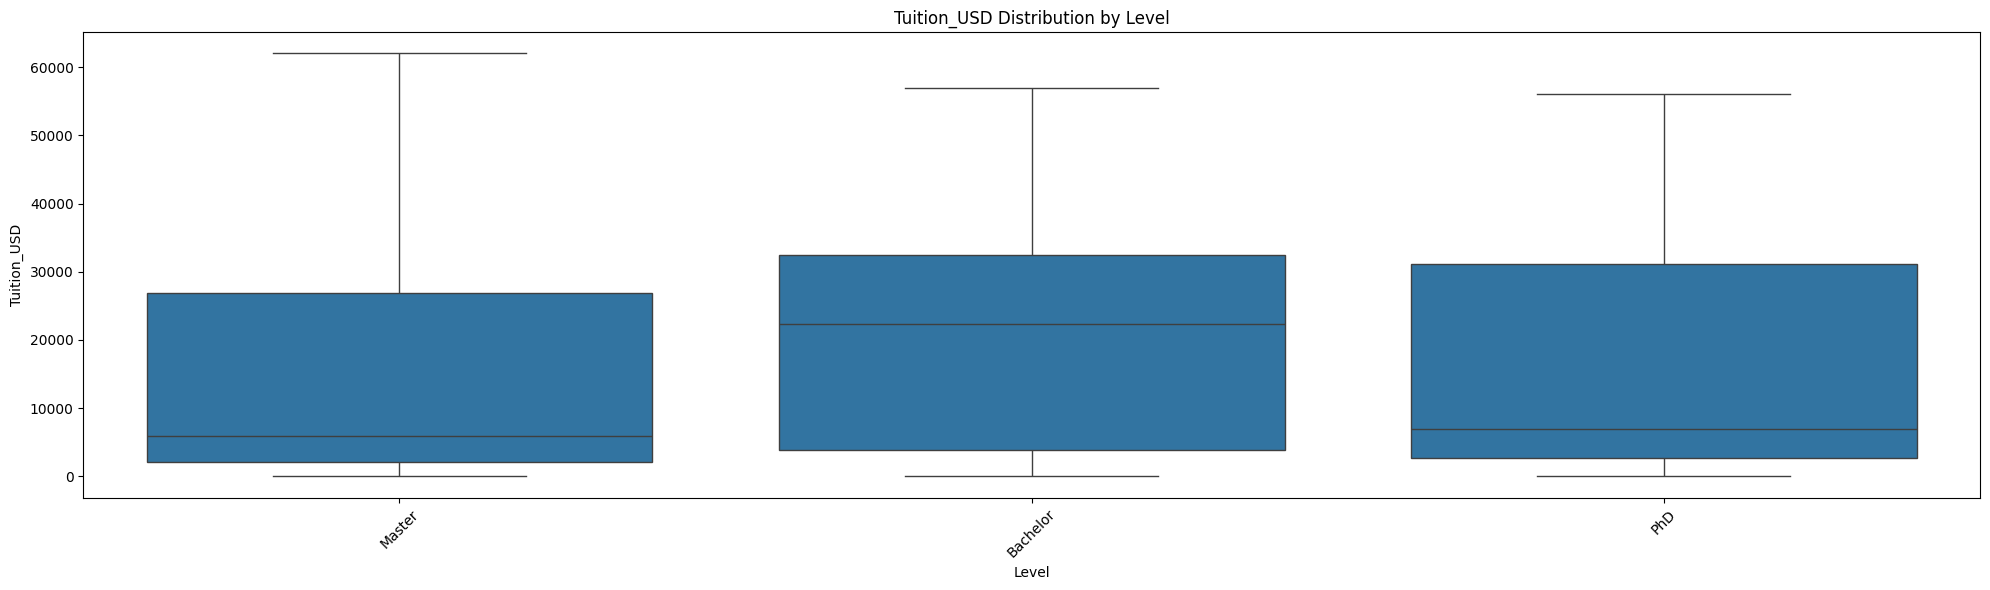

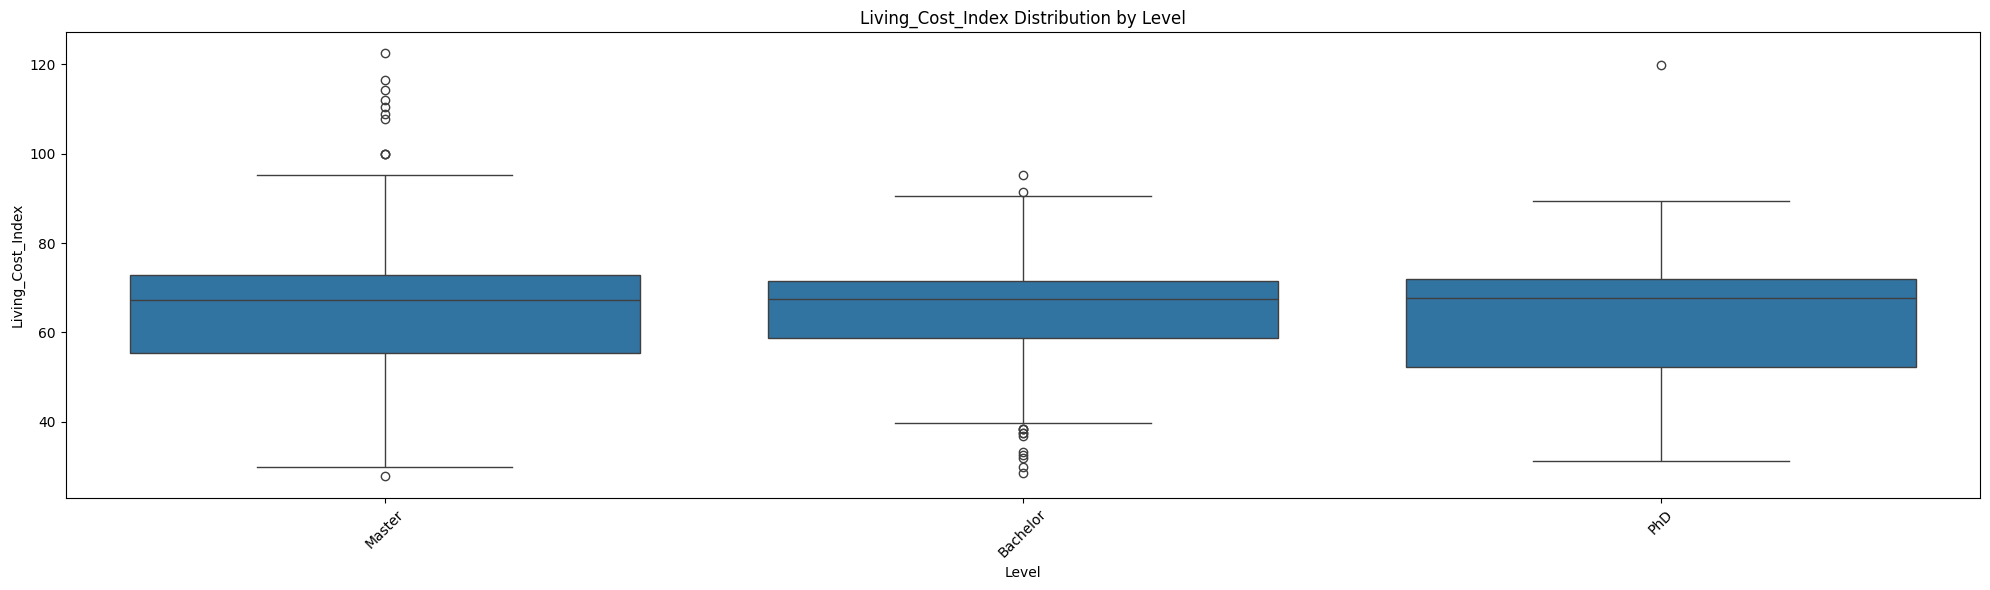

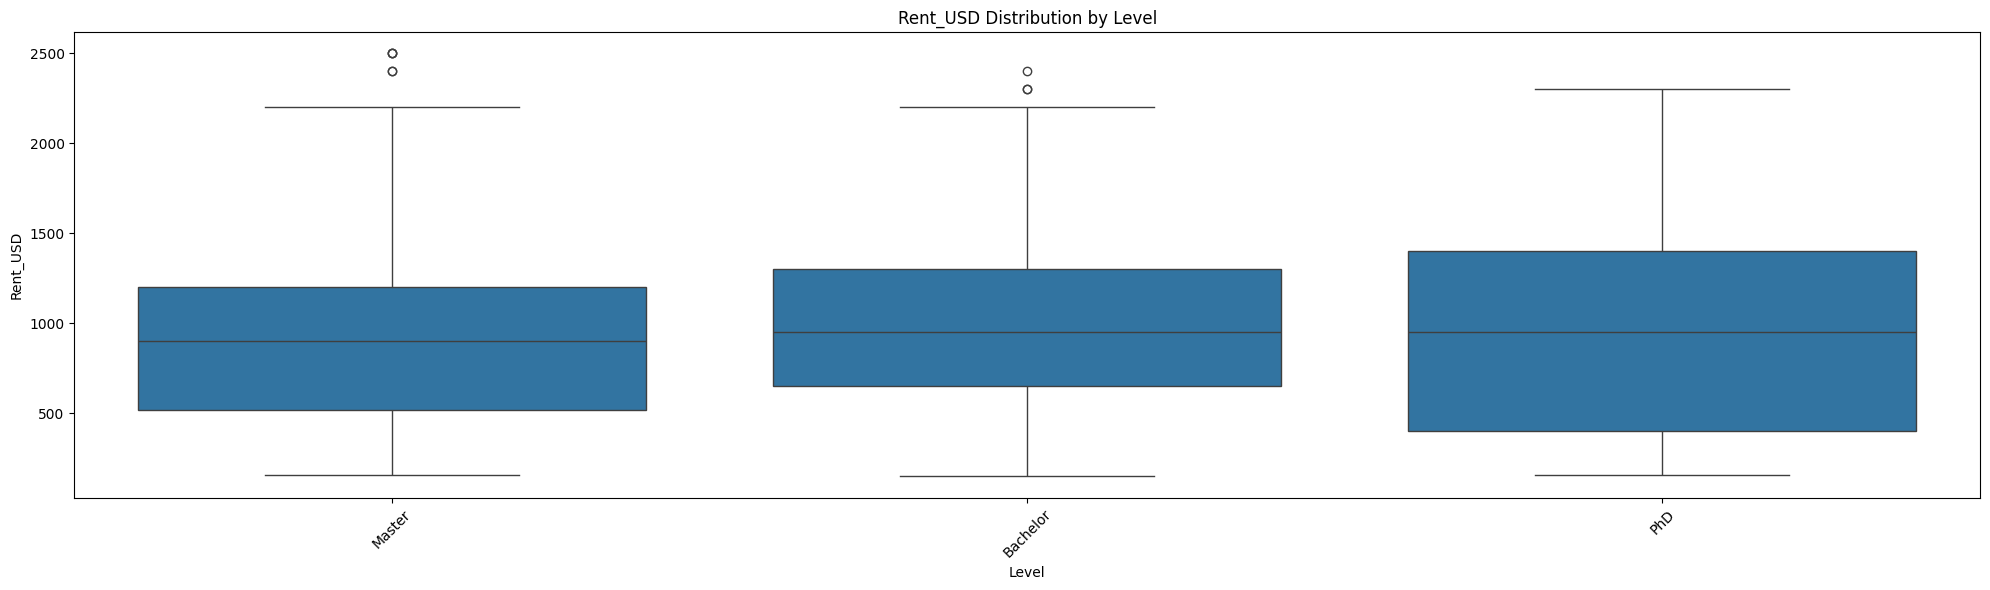

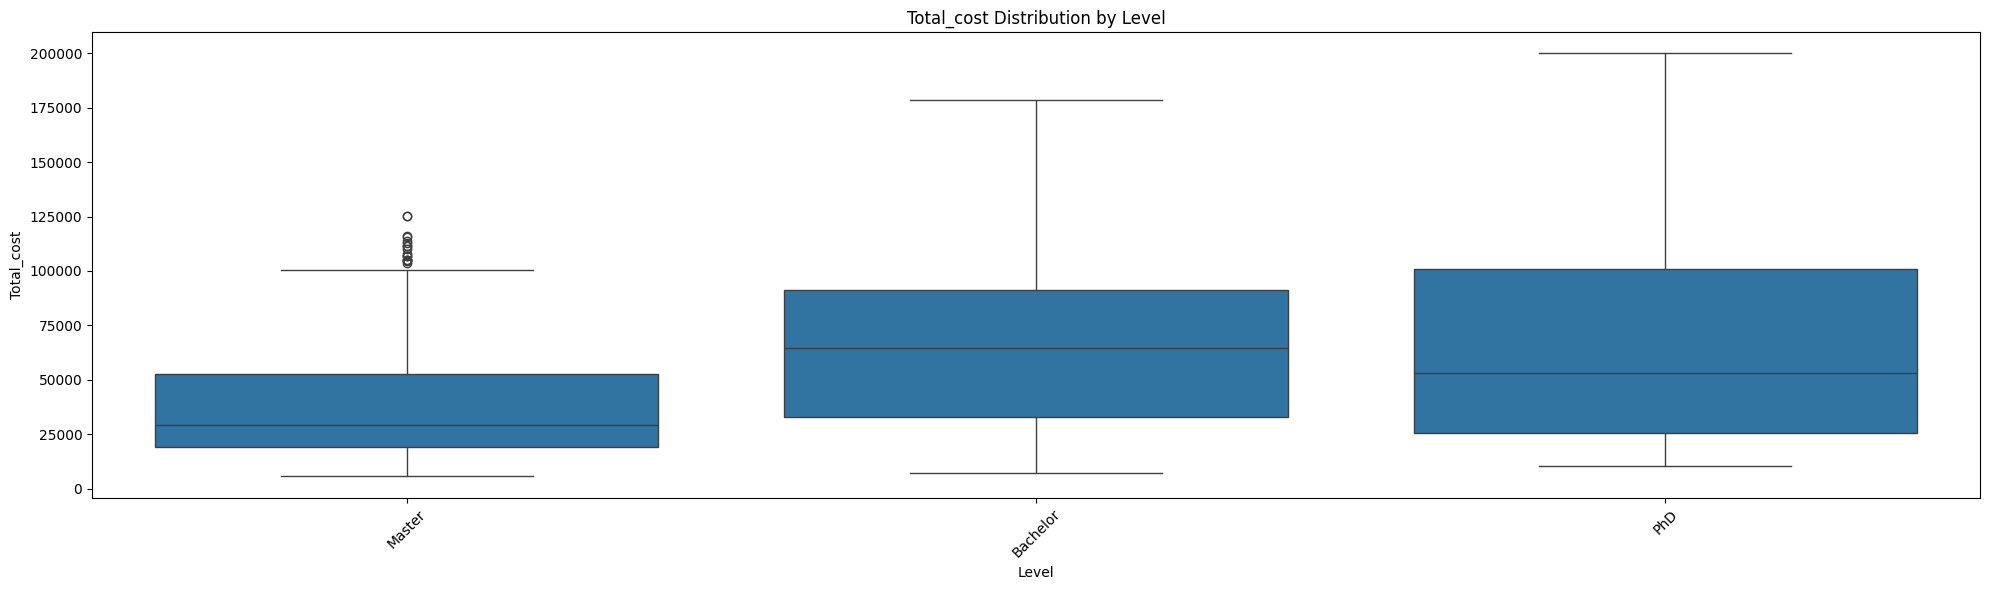

In [38]:
categorical_var = ["Country", "Level"] 
numeric_var = ["Tuition_USD", "Living_Cost_Index", "Rent_USD", "Total_cost"]
output_folder = "plots"
for c in categorical_var: 
    for n in numeric_var: 
        plt.figure(figsize= (20, 6))
        sns.boxplot(data = data, x = c, y = n)
        plt.xticks(rotation = 45)
        plt.title(f"{n} Distribution by {c}")
        filepath = os.path.join(output_folder, f"{n} Distribution by {c}.png")
        plt.tight_layout()
        plt.savefig(filepath, dpi = 300)
        plt.show()

In [39]:
# summary statistics for numeric variables
summary_stats = data[numeric_var].describe().T
# save the summary statistics to a text file
report = "summary_reports.txt"
with open(report, "w") as f:
    f.write("Summary Statistics for Numeric Variables\n")
    f.write("-" * 60 + "\n")
    f.write(summary_stats.to_string())
    f.write("\n"*2)
#--------- Top Countries with Highest Average Living Cost Index --------#  
top_countries_living_cost = data.groupby("Country")["Living_Cost_Index"].mean().sort_values(ascending=False).head(10)
top_countries_living_cost_df = top_countries_living_cost.reset_index()
top_countries_living_cost_df = top_countries_living_cost_df.rename(columns={"Living_Cost_Index": "Average_Living_Cost_Index"})
# save the table to a table report file
with open(report, "a") as f:
    f.write("Top 10 Countries with Highest Average Living Cost Index\n")
    f.write("-" * 60 + "\n")
    f.write(top_countries_living_cost_df.to_string(index=False))
    f.write("\n"*2)
#--------- Top Countries with Highest Average Tuition Cost --------#
top_countries_tuition = data.groupby("Country")["Tuition_USD"].mean().sort_values(ascending=False).head(10)
top_countries_tuition_df = top_countries_tuition.reset_index()
top_countries_tuition_df = top_countries_tuition_df.rename(columns={"Tuition_USD": "Average_Tuition_Cost"})
# save the table to a table report file
with open(report, "a") as f:
    f.write("Top 10 Countries with Highest Average Tuition Cost\n")
    f.write("-" * 60 + "\n")
    f.write(top_countries_tuition_df.to_string(index=False))
    f.write("\n"*2)
#--------- Top Countries with Highest Average Rent Cost --------#
top_countries_rent = data.groupby("Country")["Rent_USD"].mean().sort_values(ascending=False).head(10)
top_countries_rent_df = top_countries_rent.reset_index()
top_countries_rent_df = top_countries_rent_df.rename(columns={"Rent_USD": "Average_Rent_Cost"})
# save the table to a table report file
with open(report, "a") as f:
    f.write("Top 10 Countries with Highest Average Rent Cost\n")
    f.write("-" * 60 + "\n")
    f.write(top_countries_rent_df.to_string(index=False))
    f.write("\n"*2)
#--------- Top Countries with Highest Average Visa Fee --------#
top_countries_visa_fee = data.groupby("Country")["Visa_Fee_USD"].mean().sort_values(ascending=False).head(10)
top_countries_visa_fee_df = top_countries_visa_fee.reset_index()
top_countries_visa_fee_df = top_countries_visa_fee_df.rename(columns={"Visa_Fee_USD": "Average_Visa_Fee"})
# save the table to a table report file
with open(report, "a") as f:
    f.write("Top 10 Countries with Highest Average Visa Fee\n")
    f.write("-" * 60 + "\n")
    f.write(top_countries_visa_fee_df.to_string(index=False))
    f.write("\n"*2)
#--------- Top Countries with Highest Average Insurance Cost --------# 
top_countries_insurance = data.groupby("Country")["Insurance_USD"].mean().sort_values(ascending=False).head(10)
top_countries_insurance_df = top_countries_insurance.reset_index()
top_countries_insurance_df = top_countries_insurance_df.rename(columns={"Insurance_USD": "Average_Insurance_Cost"})
# save the table to a table report file
with open(report, "a") as f:
    f.write("Top 10 Countries with Highest Average Insurance Cost\n")
    f.write("-" * 60 + "\n")
    f.write(top_countries_insurance_df.to_string(index=False))
    f.write("\n"*2)


#--------- Top Countries with Highest Average Total Cost --------#
top_countries = data.groupby("Country")["Total_cost"].mean().sort_values(ascending=False).head(10)
top_countries_df = top_countries.reset_index()
top_countries_df = top_countries_df.rename(columns={"Total_cost": "Average_Total_Cost"})

# save the table to a table report file

with open(report, "a") as f:
    f.write("Top 10 Countries with Highest Average Total Cost of Education\n")
    f.write("-" * 60 + "\n")
    f.write(top_countries_df.to_string(index=False))
    f.write("\n"*2)

#-------- Top Programs with Highest Average Tuition Cost --------#

top_programs = data.groupby("Program")["Tuition_USD"].mean().sort_values(ascending=False).head(10)
top_programs_df = top_programs.reset_index()
top_programs_df = top_programs_df.rename(columns={"Programs_cost": "Average_program_Cost"})

# save the table to a table report file
with open(report, "a") as f:
    f.write("Top 10 Programs with Highest Average Tuition Cost\n")
    f.write("-" * 60 + "\n")
    f.write(top_programs_df.to_string(index=False))
    f.write("\n"*2)
#-------- Top Universities with Highest Average Tuition Cost --------#
top_universities = data.groupby("University")["Tuition_USD"].mean().sort_values(ascending=False).head(10)
top_universities_df = top_universities.reset_index()
top_universities_df = top_universities_df.rename(columns={"Tuition_USD": "Average_Tuition_Cost"})
# save the table to a table report file
with open(report, "a") as f:
    f.write("Top 10 Universities with Highest Average Tuition Cost\n")
    f.write("-" * 60 + "\n")
    f.write(top_universities_df.to_string(index=False))
    f.write("\n"*2)

1. **Derived Features**
    - Perform one-hot encoding for categorical variables and scale/transform numeric cost-related features.
    - Generate Total Cost of Attendance (TCA) and affordability-tier labels (e.g., Low/Medium/High) using quantile-based segmentation.

In [42]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import pandas as pd

# One-hot encoding for categorical variables
categorical_features = ["Country", "City", "University", "Program", "Level"]
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_features = encoder.fit_transform(data[categorical_features])

# Scale numeric cost-related features
numeric_features = ["Tuition_USD", "Living_Cost_Index", "Rent_USD", "Visa_Fee_USD", "Insurance_USD", "Total_cost"]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[numeric_features])

# Combine and create DataFrame with correct column names
encoded_columns = encoder.get_feature_names_out(categorical_features)
preprocessed_df = pd.DataFrame(
    np.hstack([encoded_features, scaled_features]),
    columns=list(encoded_columns) + numeric_features
)



# Generate affordability-tier labels using quantile-based segmentation
preprocessed_df["Affordability_Tier"] = pd.qcut(preprocessed_df["Total_cost"], q=3, labels=["Low", "Medium", "High"])

# View the updated DataFrame with the new column
preprocessed_df[["Total_cost", "Affordability_Tier"]].head()
# Save the preprocessed DataFrame to a CSV file

preprocessed_df.to_csv("preprocessed.csv", index=False)

preprocessed_df.head()

,Country_Argentina,Country_Australia,Country_Austria,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Brazil,Country_Bulgaria,Country_Canada,Country_China,...,Program_Technology & Innovation,Level_Master,Level_PhD,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Total_cost,Affordability_Tier
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.334787,1.356900,2.381246,-0.358525,2.498211,1.579707,High
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.477984,0.808801,1.607357,1.908548,0.312066,0.316970,High
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.315071,0.573902,1.220412,0.164646,0.624372,0.713621,High
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.526254,0.481366,0.833467,1.664402,-0.156394,0.671284,High
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.977782,0.431539,0.253050,-0.951452,-0.468701,-0.644874,Medium


2. **Predictive Tasks**
    - **TCA Regressor**: Develop a regression model to estimate the total cost of study based on program specifications and location attributes.
    - **Affordability Classifier**: Build a classification model to categorize each record into _Low_, _Medium_, or _High_ cost tiers.


There are two question to ask in order to tackle these questions? 
1) What total costs are predicted? 
2) How can we classify the total costs based on the affordability tier? How affordable are the study costs? 

set up the mlflow
load the data set data above preprocessed

from the dataset data the total cost and affordability tier should be dropped
For the regression models XGBoost, Random forest, GBM, the target column is total-cost.
Evaluate the regression models using the mean_absolute_error, mean_squared_error, r2_score,rmse for all the regression models
After the regression is done, then the predicted costs should be used to classify affordability, low, medium and high using the XGboost, GBM, random forest. 
Evaluate the classification models, using metrics like accuracy, precision, recall, f1 score, auc-roc, log loss
Search for the hyperparameters

3. **Clustering**
    - Apply clustering algorithms such as K-Means or HDBSCAN to group universities or destinations into cost archetypes using scaled features.
    

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import hdbscan

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Evaluate K-Means clustering using silhouette score
silhouette_avg = silhouette_score(scaled_features, kmeans_labels)
print(f"K-Means Silhouette Score: {silhouette_avg:.2f}")

# Add K-Means cluster labels to the dataset
data['KMeans_Cluster'] = kmeans_labels

# Apply HDBSCAN clustering
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5)
hdbscan_labels = hdbscan_clusterer.fit_predict(scaled_features)

# Add HDBSCAN cluster labels to the dataset
data['HDBSCAN_Cluster'] = hdbscan_labels

# Display the updated dataset with cluster labels
data[['University', 'Country', 'KMeans_Cluster', 'HDBSCAN_Cluster']].head()


# Qualitative review of clusters
# Analyze the distribution of universities and countries within each cluster
kmeans_cluster_review = data.groupby("KMeans_Cluster")[["University", "Country"]].agg(
    {"University": "count", "Country": lambda x: x.nunique()}
).rename(columns={"University": "University_Count", "Country": "Unique_Countries"})

hdbscan_cluster_review = data.groupby("HDBSCAN_Cluster")[["University", "Country"]].agg(
    {"University": "count", "Country": lambda x: x.nunique()}
).rename(columns={"University": "University_Count", "Country": "Unique_Countries"})

print("K-Means Cluster Review:")
print(kmeans_cluster_review)

print("\nHDBSCAN Cluster Review:")
print(hdbscan_cluster_review)

K-Means Silhouette Score: 0.44
K-Means Cluster Review:
                University_Count  Unique_Countries
KMeans_Cluster                                    
0                            279                12
1                            508                64
2                            120                 6

HDBSCAN Cluster Review:
                 University_Count  Unique_Countries
HDBSCAN_Cluster                                    
-1                            201                41
 0                             78                 1
 1                             11                 1
 2                             17                 2
 3                             24                 2
 4                             52                 3
 5                             70                 1
 6                             82                 1
 7                             15                 2
 8                             15                 1
 9                             20        

4. Evaluation & Tuning

- DONE in the MLFLOW integrated pipeline: Regression → MAE, RMSE, R². 
- DONE in the MLFLOW integrated pipeline: Classification → Accuracy, Macro F1, ROC-AUC.
- Clustering → Silhouette Score + qualitative review.
- Hyperparameter search for tree-based and gradient-boosted models.

### Next: Model Development 
Streamlit Web App

Budget Planner: users enter target country, level, duration, and see TCA forecasts.
Affordability Map & Dashboards.
Cluster Explorer with segment descriptions.
